版权声明：本文为CSDN博主「Font Tian」的原创文章，遵循 CC 4.0 BY-NC-SA 版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/FontThrone/java/article/details/85100328

# basic

In [1]:
from hyperopt import fmin, tpe, hp
best = fmin(
    fn=lambda x: x,
    space=hp.uniform('x', -2.5, 2.5),
    algo=tpe.suggest,
    max_evals=100)
print(best)

100%|██████████| 100/100 [00:00<00:00, 268.33trial/s, best loss: -2.499983928432613]
{'x': -2.499983928432613}


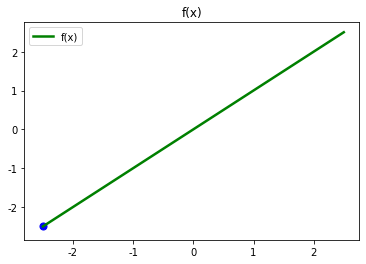

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# 为随机数固定一个数值
np.random.RandomState(seed=42)

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

x = np.linspace(-2.5, 2.5, 256, endpoint=True)  # 绘制X轴（-2.5,2）的图像

f = x  # y值

plt.plot(x, f, "g-", lw=2.5, label="f(x)")
plt.scatter(best['x'], best['x'], 50, color='blue')
plt.title('f(x)')
plt.legend()
plt.show()

100%|██████████| 100/100 [00:00<00:00, 396.67trial/s, best loss: -0.911672903916771]
{'x': 0.2136525419127422}


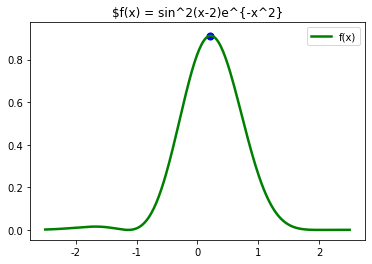

In [4]:
from hyperopt import fmin, tpe, hp


def fun_change(x):
    y = (np.sin(x - 2))**2 * (np.e)**(-x**2)
    return -y


best = fmin(
    fn=fun_change,
    space=hp.uniform('x', -2.5, 2.5),
    algo=tpe.suggest,
    max_evals=100)
print(best)

x = np.linspace(-2.5, 2.5, 256, endpoint=True)  # 绘制X轴（-2.5,2）的图像

f = (np.sin(x - 2))**2 * (np.e)**(-x**2)  # y值

plt.plot(x, f, "g-", lw=2.5, label="f(x)")
plt.scatter(best['x'], -fun_change(best['x']), 50, color='blue')
plt.title('$f(x) = sin^2(x-2)e^{-x^2}')
plt.legend()
plt.show()


In [5]:
import hyperopt.pyll.stochastic

space = {
    'x': hp.uniform('x', 0, 1),
    'y': hp.normal('y', 0, 1),
    'name': hp.choice('name', ['alice', 'bob']),
}

print(hyperopt.pyll.stochastic.sample(space))

{'name': 'bob', 'x': 0.34085680711760935, 'y': -0.36928601656800786}


100%|██████████| 1000/1000 [00:09<00:00, 102.45trial/s, best loss: -4.997872375312741]
{'x': 2.4983104926774184, 'y': 2.4995618826353225}


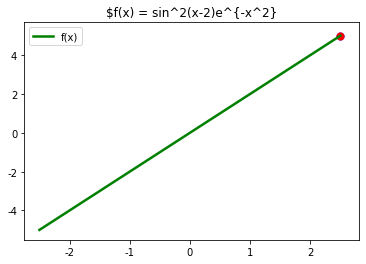

In [7]:
def fun_change(space):
    f = space['x'] + space['y']
    return -f


space = {
    "x": hp.uniform('x', -2.5, 2.5),
    "y": hp.uniform('y', -2.5, 2.5),
}

best = fmin(fn=fun_change, space=space, algo=tpe.suggest, max_evals=1000)
print(best)

x = np.linspace(-2.5, 2.5, 256, endpoint=True)  # 绘制X轴（-2.5,2.5）的图像
y = np.linspace(-2.5, 2.5, 256, endpoint=True)  # 绘制X轴（-2.5,2.5）的图像

f = x + y  # y值

plt.plot(x, f, "g-", lw=2.5, label="f(x)")
plt.scatter(best['x'], -fun_change(best), 50, color='blue')
plt.scatter(best['x'], -fun_change(best), 50, color='red')
plt.title('$f(x) = sin^2(x-2)e^{-x^2}')
plt.legend()
plt.show()

# with sklearn

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
  species   measurement  value
0  setosa  sepal_length    5.1
1  setosa  sepal_length    4.9
2  setosa  sepal_length    4.7
3  setosa  sepal_length    4.6
4  setosa  sepal_length    5.0


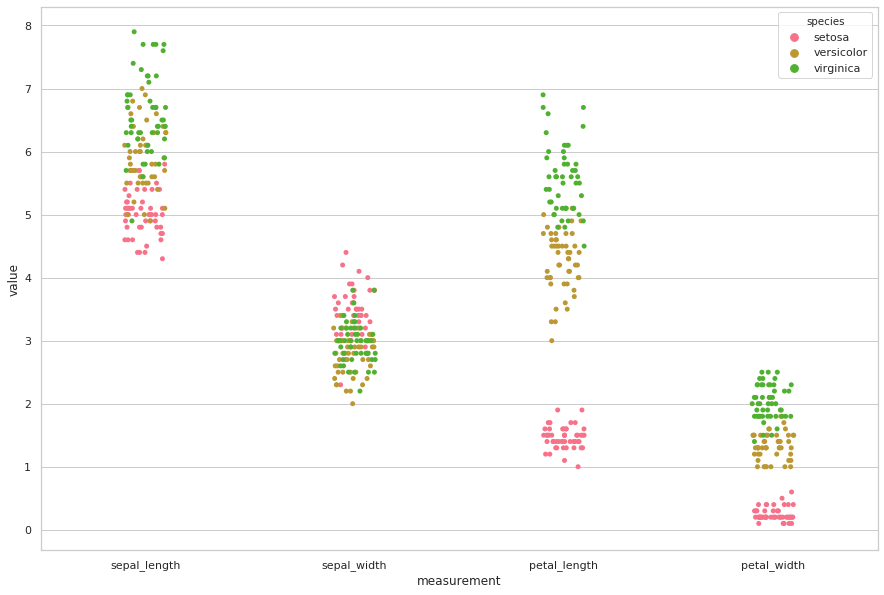

In [8]:
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid", palette="husl")

iris = sns.load_dataset("iris")
print(iris.head())

iris = pd.melt(iris, "species", var_name="measurement")
print(iris.head())

f, ax = plt.subplots(1, figsize=(15,10))
sns.stripplot(x="measurement", y="value", hue="species", data=iris, jitter=True, edgecolor="white", ax=ax)

fn: 要最小化的函式(要最大化的話加-號)

space: 欲嘗試的參數

<li>hp.choice(label, options)
返回传入的列表或者数组其中的一个选项。

<li>hp.randint(label, upper)
返回范围:[0，upper]中的随机整数。

<li>hp.uniform(label, low, high)
返回位于[low,hight]之间的均匀分布的值。在优化时，这个变量被限制为一个双边区间。

<li>hp.normal(label, mu, sigma)
    返回正态分布的实数值，其平均值为 mu ，标准偏差为 σ。优化时，这是一个无边界的变量。

In [12]:
from sklearn import datasets
from sklearn.preprocessing import normalize, scale
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# 这里的warnings实在太多了，我们加入代码不再让其显示
import warnings
warnings.filterwarnings("ignore")

from hyperopt import Trials
iris = datasets.load_iris()
X = iris.data
y = iris.target


def hyperopt_model_score_dtree(params):
    X_ = X[:]
    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
        del params['normalize']

    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
        del params['scale']
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X_, y).mean()


space_dtree = {
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'max_features': hp.choice('max_features', range(1, 5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'scale': hp.choice('scale', [0, 1]),
    'normalize': hp.choice('normalize', [0, 1])
}


def fn_dtree(params):
    acc = hyperopt_model_score_dtree(params)
    return -acc

# 为可视化做准备
trials = Trials()
best = fmin(
    fn=fn_dtree, space=space_dtree, algo=tpe.suggest, max_evals=1000, trials=trials)
print('best:')
print(best)

100%|██████████| 1000/1000 [00:16<00:00, 59.80trial/s, best loss: -0.9738562091503268]
best:
{'criterion': 0, 'max_depth': 18, 'max_features': 2, 'normalize': 0, 'scale': 1}


## 加入trial可顯示中間結果

### Decision Tree 調參可視化

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

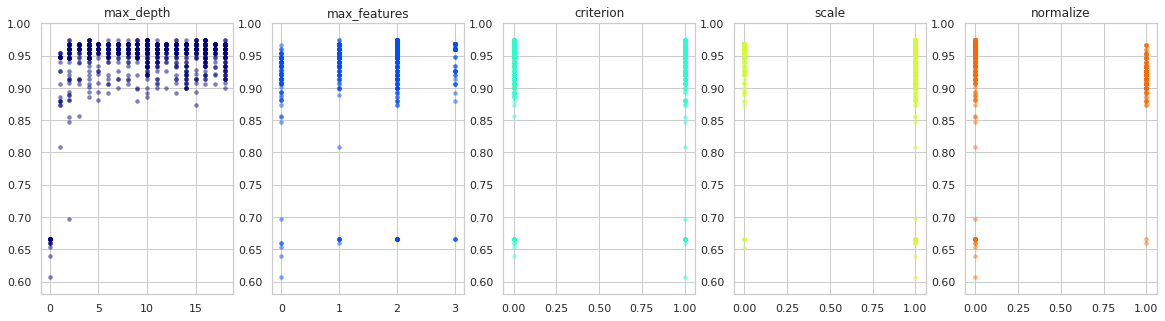

In [13]:
parameters = ['max_depth', 'max_features', 'criterion', 'scale',
              'normalize']  # decision tree
cols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20, 5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    ys = np.array(ys)
    axes[i].scatter(
        xs,
        ys,
        s=20,
        linewidth=0.01,
        alpha=0.5,
        c=cmap(float(i) / len(parameters)))
    axes[i].set_title(val)

### SVM調參可視化

100%|██████████| 1000/1000 [00:26<00:00, 37.05trial/s, best loss: -0.9934640522875817]
best:
{'C': 1.4002534116325762, 'gamma': 15.128523535778147, 'kernel': 0, 'normalize': 0, 'scale': 0}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

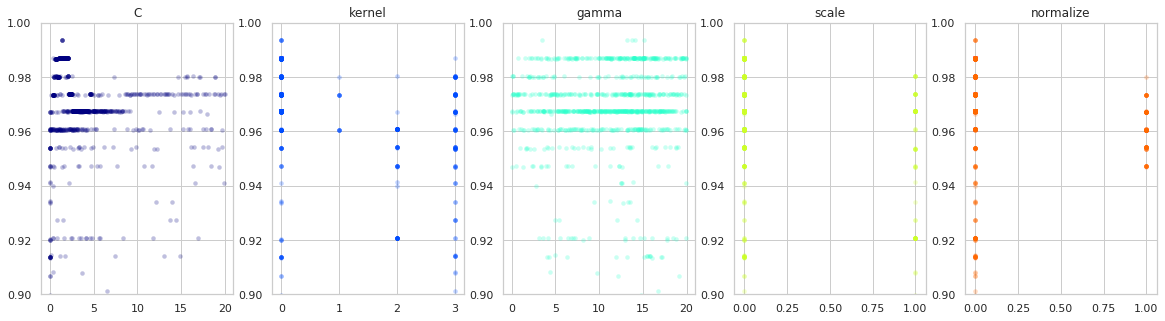

In [14]:
def hyperopt_model_score_svm(params):
    X_ = X[:]

    if 'normalize' in params:
        if params['normalize'] == 1:
            X_ = normalize(X_)
        del params['normalize']

    if 'scale' in params:
        if params['scale'] == 1:
            X_ = scale(X_)
        del params['scale']

    clf = SVC(**params)
    return cross_val_score(clf, X_, y).mean()


space_svm = {
    'C': hp.uniform('C', 0, 20),
    'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
    'gamma': hp.uniform('gamma', 0, 20),
    'scale': hp.choice('scale', [0, 1]),
    'normalize': hp.choice('normalize', [0, 1])
}


def f_svm(params):
    acc = hyperopt_model_score_svm(params)
    return -acc


trials = Trials()
best = fmin(f_svm, space_svm, algo=tpe.suggest, max_evals=1000, trials=trials)
print('best:')
print(best)

parameters = ['C', 'kernel', 'gamma', 'scale', 'normalize']
cols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20, 5))
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    axes[i].scatter(
        xs,
        ys,
        s=20,
        linewidth=0.01,
        alpha=0.25,
        c=cmap(float(i) / len(parameters)))
    axes[i].set_title(val)
    axes[i].set_ylim([0.9, 1.0])


In [15]:
params = {'C': 3.383042170158757, 'gamma': 2.4082659264264454, 'kernel': "poly"}
clf = SVC(**params)
print(cross_val_score(clf, normalize(X), y).mean())

0.9473039215686274


### 一次比多個模型

In [16]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)


from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

def hyperopt_train_test(params):
    t = params['type']
    del params['type']
    if t == 'naive_bayes':
        clf = BernoulliNB(**params)
    elif t == 'svm':
        clf = SVC(**params)
    elif t == 'dtree':
        clf = DecisionTreeClassifier(**params)
    elif t == 'knn':
        clf = KNeighborsClassifier(**params)
    else:
        return 0
    return cross_val_score(clf, X, y).mean()

space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
        'alpha': hp.uniform('alpha', 0.0, 2.0)
    },
    {
        'type': 'svm',
        'C': hp.uniform('C', 0, 10.0),
        'kernel': hp.choice('kernel', ['linear', 'rbf']),
        'gamma': hp.uniform('gamma', 0, 20.0)
    },
    {
        'type': 'dtree',
        'max_depth': hp.choice('max_depth', range(1, 20)),
        'max_features': hp.choice('max_features', range(1, 5)),
        'criterion': hp.choice('criterion', ["gini", "entropy"]),
    },
    {
        'type': 'knn',
        'n_neighbors': hp.choice('knn_n_neighbors', range(1,50))
    }
])

count = 0
best = 0
def f(params):
    global best, count
    count += 1
    acc = hyperopt_train_test(params.copy())
    if acc > best:
        print('new best:', acc, 'using', params['type'])
        print('iters:', count, ', acc:', acc, 'using', params)
        best = acc
    if count % 50 == 0:
        print('iters:', count, ', acc:', acc, 'using', params)
    return -acc

trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=1500, trials=trials)
print('best:')
print(best)

(1797, 64) (1797,)
new best:                                               
0.9437997276286755                                      
using                                                   
svm                                                     
iters:                                                  
1                                                       
, acc:                                                  
0.9437997276286755                                      
using                                                   
{'C': 2.6986900554383118, 'gamma': 5.947288669415151, 'kernel': 'linear', 'type': 'svm'}
new best:                                                                          
0.9644039680147021                                                                 
using                                                                              
knn                                                                                
iters:                                     

0.9215402111131507                                                                  
using                                                                               
{'n_neighbors': 48, 'type': 'knn'}                                                  
iters:                                                                              
650                                                                                 
, acc:                                                                              
0.9348876796786962                                                                  
using                                                                               
{'n_neighbors': 31, 'type': 'knn'}                                                  
iters:                                                                              
700                                                                                 
, acc:                                                           

, acc:                                                                               
0.10463451755934179                                                                  
using                                                                                
{'C': 3.26044504168377, 'gamma': 6.0929644397154865, 'kernel': 'rbf', 'type': 'svm'} 
iters:                                                                               
1450                                                                                 
, acc:                                                                               
0.9348821333362318                                                                   
using                                                                                
{'n_neighbors': 30, 'type': 'knn'}                                                   
iters:                                                                               
1500                                                  

In [17]:
params = {'n_neighbors': 3}
clf = KNeighborsClassifier(**params)
print("best score",cross_val_score(clf, X, y).mean())

best score 0.968293886616605


tpe.suggest是一种带有启发性的搜索算法。类似于遗传算法，粒子群算法。有时候算法可能在一开始就陷入局部最优的区域之中。

一种比较好的解决方案就是选择其他搜索函数-rand.suggest。但是也正是因为随机搜索缺乏启发性，所以随机搜索想要获得较好的结果也往往需要更多的搜索次数

In [18]:
def fn_dtree(params):
    acc = hyperopt_model_score_dtree(params)
    return -acc

# 为可视化做准备
trials = Trials()
from hyperopt import rand
best = fmin(
    fn=fn_dtree, space=space_dtree, algo=rand.suggest, max_evals=1000, trials=trials)
print('best:')
print(best)

100%|██████████| 1000/1000 [00:12<00:00, 81.13trial/s, best loss: -0.7445841920082715]
best:
{'criterion': 1, 'max_depth': 18, 'max_features': 3, 'normalize': 0, 'scale': 1}


In [19]:
params = {'criterion': "entropy", 'max_depth': 9, 'max_features': 2}
clf = DecisionTreeClassifier(**params)
print(cross_val_score(clf, normalize(X), y).mean())

0.5865425748848981
